In [1]:
import SRRS

In [1]:
from SRRS import plotting,metrics,vignette,simulate,scoring
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sample = vignette.m1s1_large_hdf5()
cells = sample.cells()
len(cells)

152

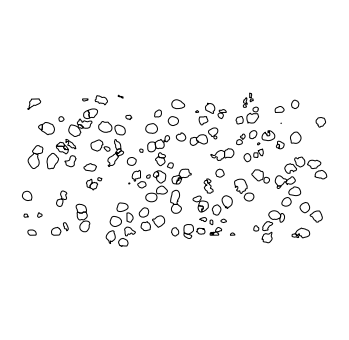

In [2]:
fig = plotting.plot_tissue_level(cells)

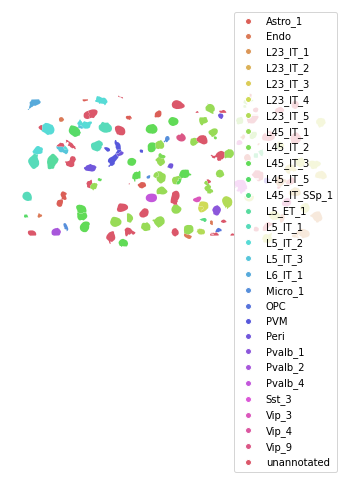

In [3]:
fig = plotting.plot_tissue_level(cells, color_by_ontology=True)

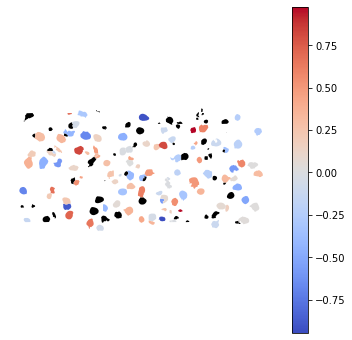

In [4]:
scored_cells = list(scoring._iter_scores(cells, 'peripheral'))
fig = plotting.plot_tissue_level(scored_cells, color_by_score_gene='Acta2')

Before permuting C1ql3=534.0 Pou6f2=804.0


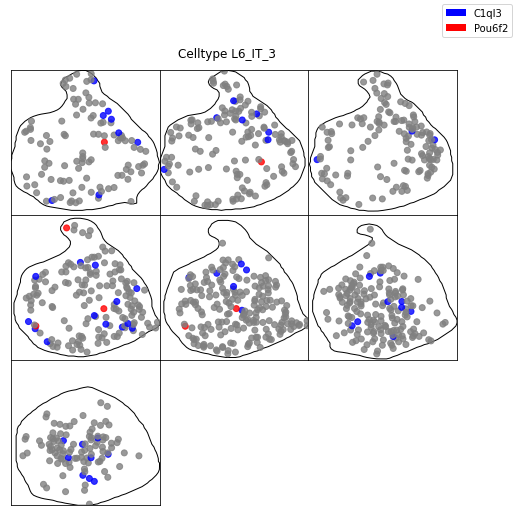

In [1]:
from SRRS import plotting,metrics,vignette,simulate
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sample = vignette.m1s4_hdf5()
cells = sample.cells()

cell = cells[0]
cell = metrics.peripheral(cell)

genes = ['C1ql3','Pou6f2']
colors = ['blue','red']
gene_colors = {g:c for g,c in zip(genes,colors)}
gene_meds = ' '.join(['{}={}'.format(g,cell.gene_med_ranks[g]) for g in genes])

print('Before permuting '+gene_meds)
fig = plotting.plot_cell_zslices(cell,gene_colors=gene_colors)


In [11]:
simulate.exp_permute_gene_labels(cell,metric='peripheral')

Cell-100042292675978612289781789372249900646-L6_IT_3

After permuting C1ql3=317.0 Pou6f2=558.0


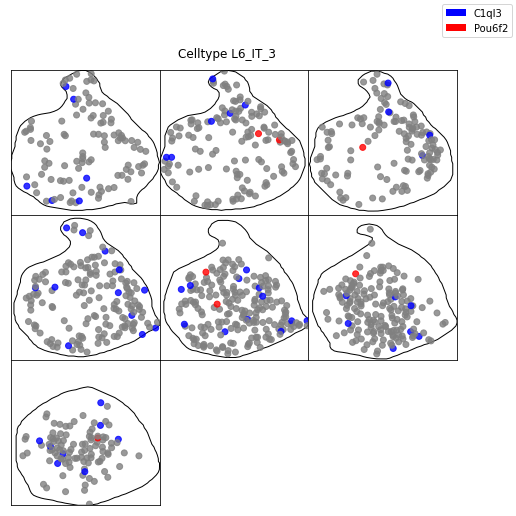

In [48]:
import importlib
importlib.reload(simulate)
gene_ks={
    'C1ql3':1, #biased towards smaller ranks
}

cell = simulate.exp_permute_gene_labels(
    cell,
    metric='peripheral',
    gene_ks=gene_ks,
)
gene_meds = ' '.join(['{}={}'.format(g,cell.gene_med_ranks[g]) for g in genes])

print('After permuting '+gene_meds)
fig = plotting.plot_cell_zslices(cell,gene_colors=gene_colors)

In [22]:
cell.n

1015

In [29]:
ks = [0.04,0.2,1,5,50]
num_its = 100
med_ranks = {}

for k in ks:
    
    gene_ks={
        'C1ql3':k, #biased towards smaller ranks
    }
    
    med_ranks[k] = []

    for it in range(num_its):

        cell = simulate.lin_permute_gene_labels(
            cell,
            metric='peripheral',
            gene_ks=gene_ks,
        )
        med_ranks[k].append(cell.gene_med_ranks['C1ql3'])

med_ranks

{0.04: [646.0,
  581.0,
  685.0,
  698.0,
  738.0,
  722.0,
  708.0,
  764.0,
  687.0,
  673.0,
  787.0,
  750.0,
  678.0,
  717.0,
  681.0,
  640.0,
  724.0,
  698.0,
  648.0,
  706.0,
  766.0,
  712.0,
  666.0,
  703.0,
  672.0,
  783.0,
  618.0,
  748.0,
  671.0,
  681.0,
  733.0,
  603.0,
  680.0,
  716.0,
  731.0,
  684.0,
  738.0,
  682.0,
  783.0,
  730.0,
  697.0,
  686.0,
  728.0,
  704.0,
  648.0,
  672.0,
  725.0,
  639.0,
  730.0,
  735.0,
  673.0,
  669.0,
  727.0,
  721.0,
  748.0,
  745.0,
  701.0,
  725.0,
  678.0,
  700.0,
  682.0,
  746.0,
  708.0,
  646.0,
  646.0,
  646.0,
  643.0,
  679.0,
  711.0,
  695.0,
  684.0,
  596.0,
  721.0,
  731.0,
  646.0,
  708.0,
  733.0,
  757.0,
  727.0,
  622.0,
  612.0,
  573.0,
  699.0,
  636.0,
  599.0,
  682.0,
  705.0,
  616.0,
  722.0,
  726.0,
  736.0,
  718.0,
  711.0,
  717.0,
  762.0,
  612.0,
  545.0,
  625.0,
  590.0,
  679.0],
 0.2: [586.0,
  623.0,
  635.0,
  689.0,
  698.0,
  642.0,
  693.0,
  595.0,
  670.0,
  680.0

In [49]:
ks = [-1,-0.5,0,0.5,1]
num_its = 100
med_ranks = {}

for k in ks:
    
    gene_ks={
        'C1ql3':k, #biased towards smaller ranks
    }
    
    med_ranks[k] = []

    for it in range(num_its):

        cell = simulate.exp_permute_gene_labels(
            cell,
            metric='peripheral',
            gene_ks=gene_ks,
        )
        med_ranks[k].append(cell.gene_med_ranks['C1ql3'])

med_ranks

{-1: [669.0,
  561.0,
  598.0,
  644.0,
  556.0,
  485.0,
  655.0,
  627.0,
  596.0,
  633.0,
  569.0,
  573.0,
  628.0,
  562.0,
  704.0,
  606.0,
  699.0,
  581.0,
  530.0,
  544.0,
  444.0,
  620.0,
  669.0,
  609.0,
  636.0,
  659.0,
  705.0,
  687.0,
  622.0,
  655.0,
  685.0,
  701.0,
  693.0,
  636.0,
  686.0,
  590.0,
  624.0,
  558.0,
  514.0,
  668.0,
  625.0,
  599.0,
  664.0,
  625.0,
  635.0,
  550.0,
  650.0,
  698.0,
  684.0,
  759.0,
  633.0,
  596.0,
  627.0,
  623.0,
  636.0,
  634.0,
  585.0,
  626.0,
  574.0,
  579.0,
  639.0,
  567.0,
  657.0,
  608.0,
  632.0,
  576.0,
  583.0,
  637.0,
  676.0,
  604.0,
  575.0,
  654.0,
  687.0,
  713.0,
  512.0,
  512.0,
  584.0,
  650.0,
  641.0,
  468.0,
  650.0,
  595.0,
  682.0,
  542.0,
  551.0,
  530.0,
  581.0,
  536.0,
  538.0,
  529.0,
  642.0,
  547.0,
  627.0,
  610.0,
  624.0,
  622.0,
  585.0,
  565.0,
  579.0,
  594.0],
 -0.5: [503.0,
  603.0,
  582.0,
  621.0,
  697.0,
  550.0,
  591.0,
  733.0,
  552.0,
  653.0,

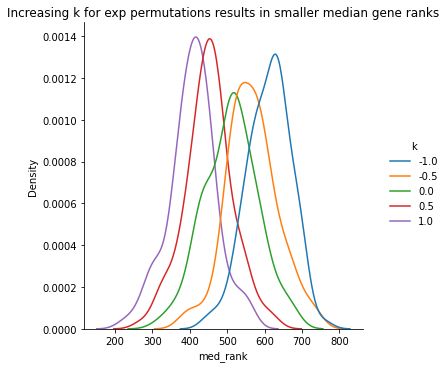

In [87]:
plot_df = pd.DataFrame(med_ranks)
plot_df = plot_df.melt(var_name='k',value_name='med_rank')
plot_df['k'] = plot_df['k'].astype(str)

sns.displot(
    x = 'med_rank',
    hue = 'k',
    kind = 'kde',
    data = plot_df,
)
plt.title('Increasing k for exp permutations results in smaller median gene ranks')
plt.show()
plt.close()